In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

#### 목표
- 유방암 데이터 셋을 활용한 이진 분류 모델링

In [2]:
breast_data = load_breast_cancer() # 유방암 데이터셋 로드

In [3]:
breast_data.keys()
# sklearn에서 제공 데이터셋은 번치객체 -> 딕셔너리처럼 활용

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
X = breast_data["data"] # 문제데이터
y = breast_data["target"]

In [5]:
X.shape, y.shape

((569, 30), (569,))

In [6]:
pd.Series(y).value_counts() # 1:양성, 0:음성

1    357
0    212
Name: count, dtype: int64

In [7]:
# train, test 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2024,
                                                    stratify = y)

딥러닝 : 인공신경망을 활용하여 학습과 예측을 수행하는 기술

ML vs DL
ML : 완성된 객체를 생성해서 학습, 예측, 평가
  - 화이트 박스 : 내부의 구조를 이해하기 쉬운 형태
  - 해석 가능성이 중요한 경우 -> DT
  - 연산 자원이 제한되는 경우
  - 비선형성이 강하지 않는 경우(데이터셋이 단순한 경우)
  - 데이터셋이 적을 때

DL : 모델의 구조를 직접 설계해서 학습, 예측 평가
  - 블랙박스 : 내부의 구조를 이해하기 어려운 형태
  - ex.알파고

DL 설계 순서
1. 신경망 구조 설계
   1) 모델 뼈대
   2) 입력층
   3) 은닉층
   4) 출력층
2. 학습방법 설정 -> compile(loss, metrics, optimizer)
3. 학습
4. 평가

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import SGD

In [9]:
# 1. 신경만 구조 설계(회귀, 이진분류, 다중분류에 따라 출력층도 달라짐)

# 뼈대
model = Sequential()

# 입력층 -> 입력 모양 정하기
model.add(InputLayer(shape = (30, )))

# 중간층 -> 중간층의 여부에 따라 MLP(다층퍼셉트론)로 구분지을 수 있음!
model.add(Dense(units = 32, activation = "sigmoid"))
model.add(Dense(units = 64, activation = "sigmoid"))
model.add(Dense(units = 128, activation = "sigmoid"))
model.add(Dense(units = 64, activation = "sigmoid"))
model.add(Dense(units = 32, activation = "sigmoid"))
# 뉴런(유닛)의 수는 정답이 없음!
# 단, 출력층의 뉴런보다 은닉층의 마지막 층의 뉴런 수가 적으면 부족한 정보가 일어날 수 있음!

# 출력층
model.add(Dense(units = 32, activation = 'sigmoid'))
# 회귀와 이진분류 -> units = 1, 회귀는 연속적인 값 1ea, 이진분류는 0~1 사이의 확률에 의한 값 1ea
# 다중분류 -> units = 클래스 개수만큼

# 출력층의 activation -> 출력값의 형태를 지정
# 회귀 : linear(항등)
# 이진분류 : sigmoid(시그모이드) 0~1 사이의 확률값 -> 0 or 1를 예측
# 다중분류 : softmax(소프트맥스) 클래스의 개수만큼 확률 -> 확률값의 총 합은 1

In [10]:
# 1. 신경망 구조 설계 (이진 분류)
model = Sequential()

# 입력층 -> 입력 모양 정하기
model.add(InputLayer(shape=(30,)))

# 중간층 -> MLP(다층퍼셉트론)
model.add(Dense(units=32, activation="relu")) # 다양한 activation function이 존재함!
model.add(Dense(units=64, activation="relu")) # 잘 모르겠으면, relu 선택!
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=64, activation="relu"))
model.add(Dense(units=32, activation="relu"))

# 출력층 (이진 분류에 맞게 수정)
model.add(Dense(units=1, activation='relu'))

In [11]:
# 2. 학습방법 설정(회귀, 이진분류, 다중분류에 따라 지정해야 하는 loss, metrics가 달라지게 됨)
model.compile(
    loss="binary_crossentropy",  # 이항 교차 엔트로피
    metrics=["accuracy"],
    optimizer=SGD()
)

# loss 설정
# 회귀 -> mean_squared_error
# 이진분류 -> binary_crossentropy
# 다중분류 -> categorical_crossentropy(범주형 교차 엔트로피)

In [12]:
#3. 학습
h = model.fit(X_train, y_train, validation_split=0.2, epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.4491 - loss: 8.7397 - val_accuracy: 0.3250 - val_loss: 10.8797
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3765 - loss: 10.0492 - val_accuracy: 0.3250 - val_loss: 10.8797
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3788 - loss: 10.0124 - val_accuracy: 0.3250 - val_loss: 10.8797
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4171 - loss: 9.3947 - val_accuracy: 0.3250 - val_loss: 10.8797
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3991 - loss: 9.6850 - val_accuracy: 0.3250 - val_loss: 10.8797
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3900 - loss: 9.8327 - val_accuracy: 0.3250 - val_loss: 10.8797
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3722 - loss: 10.1182 - val_accuracy: 0.3250 - val_loss: 10.8797
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4222 - loss: 9.3123 - val_ac

In [13]:
# 4. 평가
model.evaluate

<bound method TensorFlowTrainer.evaluate of <Sequential name=sequential_1, built=True>>

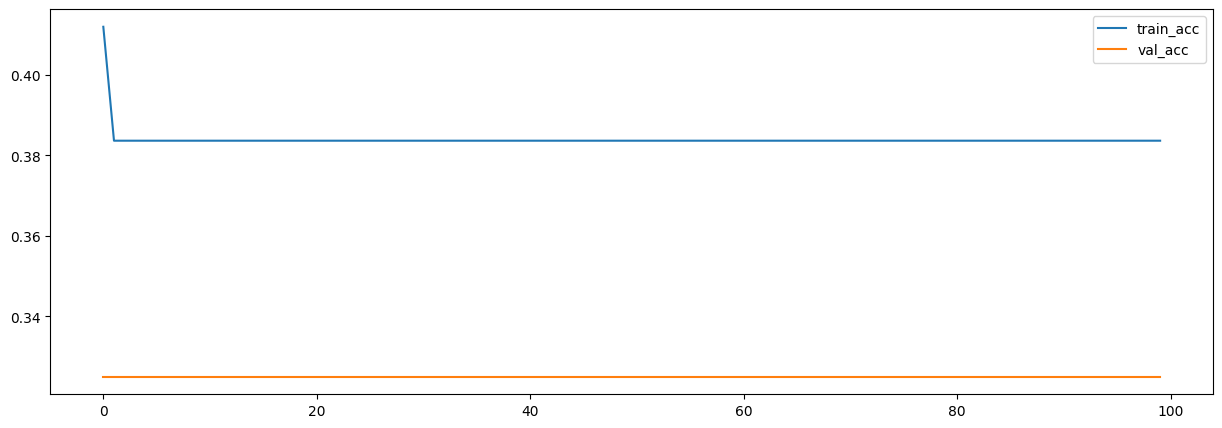

In [15]:
plt.figure(figsize = (15,5))
plt.plot(h.history["accuracy"], label = "train_acc")
plt.plot(h.history["val_accuracy"], label = "val_acc")
plt.legend()
plt.show()

* 오차역전파 : 딥러닝 모델의 동작 방식
1. 순전파 : 입력층에서 출력층 방향으로 예측을 수행
2. 오차계산 : 순전파에 의해 예측값과 실제값 간의 오차 계산
3. 역전파 : 오차값을 기반으로 w와 b를 업데이트하는 과정 -> 학습, 체인룰을 통해 효율적인 계산 가능!

- 활성화 함수(Activation Func)
- 중간층 : 역치의 역할을 수행
   - step, sigmoid, tanh, linear, relu, leaky relu... 등
   - step에서 "오차의 정도"를 반영하기 위해 sigmoid를 도입
   - sigmoid 단점 -> 미분(기울기를 구할 때) 시 값의 범위가 0~0.25
      -> 다음 층으로 오차를 전달할 때, 오차의 값을 최대 25%까지만 전달
      -> 역전파 과정(학습)에서 입력층에 가까운 층들은 오차의 전달이 제대로 이루어지지 않음
      -> 기울기 소실 문제(Vanishing Gradient) 발생
   - tanh(하이퍼 볼릭 탄젠트, -1 ~ 1) -> 미분 시 값의 범위가 0 ~ 1 사이의 값
      -> 양쪽 끝단에서 기울기 소실문제가 발생
   - relu : 음수인 경우 0으로, 양수인 경우 그대로(기울기 값이 소실되지 않음) 반환
      -> 보편적으로 가장 많이 사용
   - leaky relu : 음수인 경우 조금만 사용(0.01 곱함) -> relu랑 큰 차이는 없음
   - elu : 음수인 경우 0에 가까울수록 많이, 0에 멀어질수록 적게 -> 성능이 드라마틱해지진 않음
   - 딥러닝 알고리즘마다 적절한 활성화 함수 선택 필요
      -> ex.RNN 계열 (tanh 함수)
   - relu 계열 선택이 좋은 선택이 될 수 있음

- 출력층 : 출력 형태를 정함
   - 회귀 : linear(항등함수, 기본값)
   - 이진분류 : sigmoid(시그모이드, 0~1 사이의 값으로 0.5 기준 확률값 제공)
   - 다중분류 : softmax(소프트맥스, 클래스별 확률을 제공)
      - ex. A = 20%, B = 40%, AB = 10%, O = 30% -> B형!

- 최적화 함수(optimizer, 경사하강법 종류)
   - BGD(배치 경사하강법) : 전체 데이터를 사용하여 학습
   - SGD(확률적 경사하강법) : 일부 데이터 하나만 사용하여 학습
   - Mini Batch GD(미니배치) : 일부 데이터의 배치(그룹)를 활용하여 학습
   - 모멘텀(Momentum) : 관성, 이전 배치를 고려하여 학습
   - NAG : 관성, 이후 배치를 고려하여 학습
   - AdaGrad : 보폭의 크기(학습률)를 줄여나가는 방법
   - Adam : 보폭의 크기와 관성을 모두 고려(현재 가장 많이 쓰이는 최적화 함수)